EQUIPE:
Antônio Gabriel dos Santos Clemente - agsc

Jose Izaias da Silva Junior - jisj

Leandro Luiz de Lima Freitas - lllf

Tomás Nascimento Santos - tns


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, svm, tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree

In [ ]:
# 1. Carregar a base de dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
data = pd.read_csv(url, header=None)

# Definir os nomes das colunas
data.columns = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
    'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
    'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[',
    'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total', 'class'
]

# Separar as features (X) e a variável target (y)
X = data.drop('class', axis=1)
y = data['class']

In [ ]:

#dividindo em treinamento validação e teste

# treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

<ipython-input-4-8b55b710e88c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='viridis')


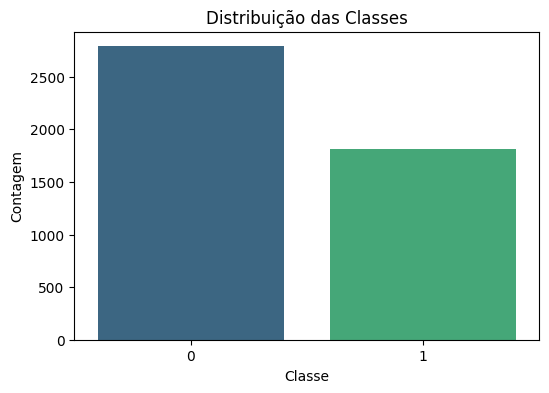

In [ ]:
# Visualizar a distribuição das classes
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette='viridis')
plt.title("Distribuição das Classes")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.show()

# Arvore de **Decisão**

Utilizei processo de ajuste de hiperparâmetros com validação cruzada para encontrar os melhores valores para max_depth, min_samples_split e min_samples_leaf.

Após encontrar os melhores hiperparâmetros com GridSearchCV, treinei o modelo final com esses parâmetros e avaliei o desempenho.

In [ ]:
# 3. Ajuste de hiperparâmetros com validação cruzada
# Definir o modelo de Árvore de Decisão
dt_classifier = DecisionTreeClassifier(random_state=42)

# Definir os hiperparâmetros para ajuste
param_grid = {
    'max_depth': [None, 5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

max_depth define a profundidade máxima da árvore, ou seja, o número máximo de divisões (níveis) que ela pode ter da raiz até uma folha.

min_samples_split esse parâmetro define o número mínimo de amostras necessárias para dividir um nó interno da árvore.

In [ ]:
# Usar GridSearchCV para validação cruzada
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores hiperparâmetros:", best_params)

Melhores hiperparâmetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Treinar o modelo final com os melhores hiperparâmetros
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)

# 4. Avaliar o modelo no conjunto de teste
y_pred = best_dt_classifier.predict(X_test)

# Calcular as métricas de avaliação
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Precision: 0.9119
Recall: 0.8750
F1-Score: 0.8931

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       837
           1       0.91      0.88      0.89       544

    accuracy                           0.92      1381
   macro avg       0.92      0.91      0.91      1381
weighted avg       0.92      0.92      0.92      1381



Precision: Indica quantos dos emails classificados como spam realmente são spam.

Recall : Mede a capacidade do modelo de identificar todos os spams corretamente.

O F1-Score é a média harmônica entre precisão e recall, equilibrando os dois.

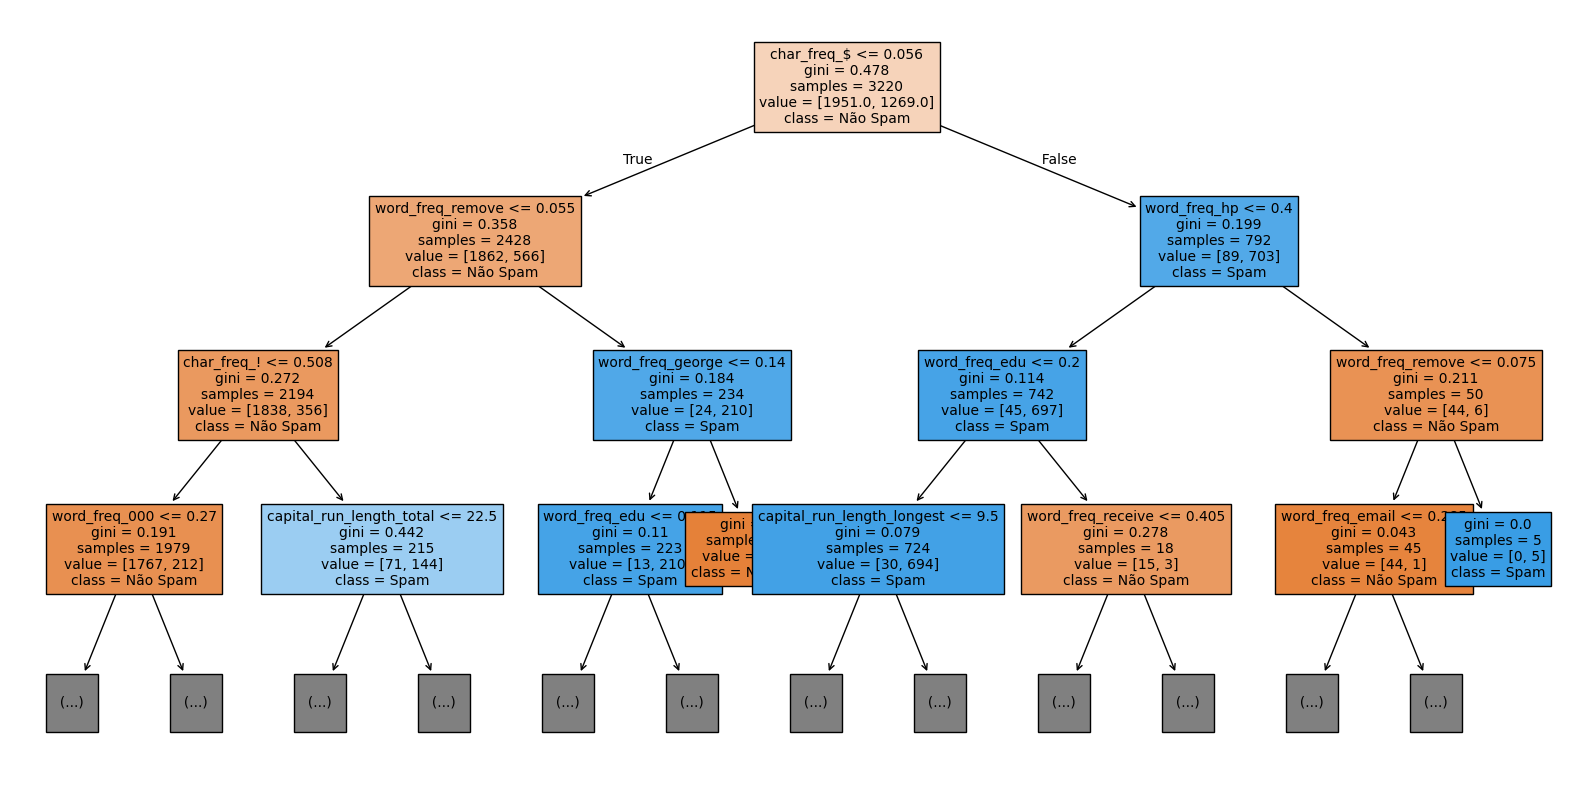

In [ ]:
# Define o tamanho da figura
plt.figure(figsize=(20, 10))

# Plota a árvore com profundidade máxima de 3
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns,
          class_names=["Não Spam", "Spam"], fontsize=10, max_depth=3)

plt.show()

A árvore começa dividindo os dados com base na frequência do caractere $.

Se essa frequência for ≤ 0.056, o modelo continua analisando outros atributos, como word_freq_remove e char_freq_!.
Se for > 0.056, o modelo foca em outras palavras como word_freq_hp e word_freq_edu.

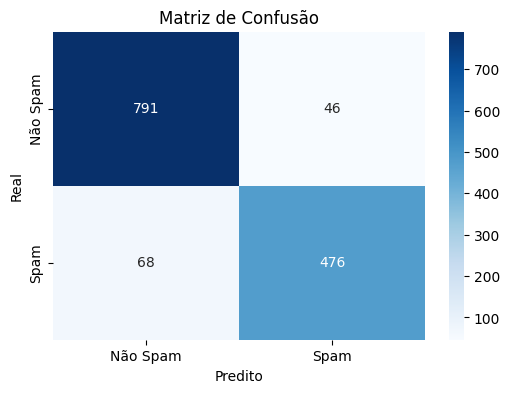

In [ ]:
# 5. Matriz de Confusão -> Para visualizar erros de classificação.
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Spam', 'Spam'], yticklabels=['Não Spam', 'Spam'])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

Verdadeiros Negativos (TN) - 791: O modelo classificou corretamente 791 emails como não spam.

Falsos Positivos (FP) - 46: O modelo classificou 46 emails legítimos como spam erroneamente.

Falsos Negativos (FN) - 68: O modelo classificou 68 emails de spam como não spam, permitindo que eles passem despercebidos.

O número de FP (46) é baixo, o que significa que poucos emails legítimos foram marcados incorretamente como spam.

O número de FN (68) mostra que alguns spams passaram despercebidos.

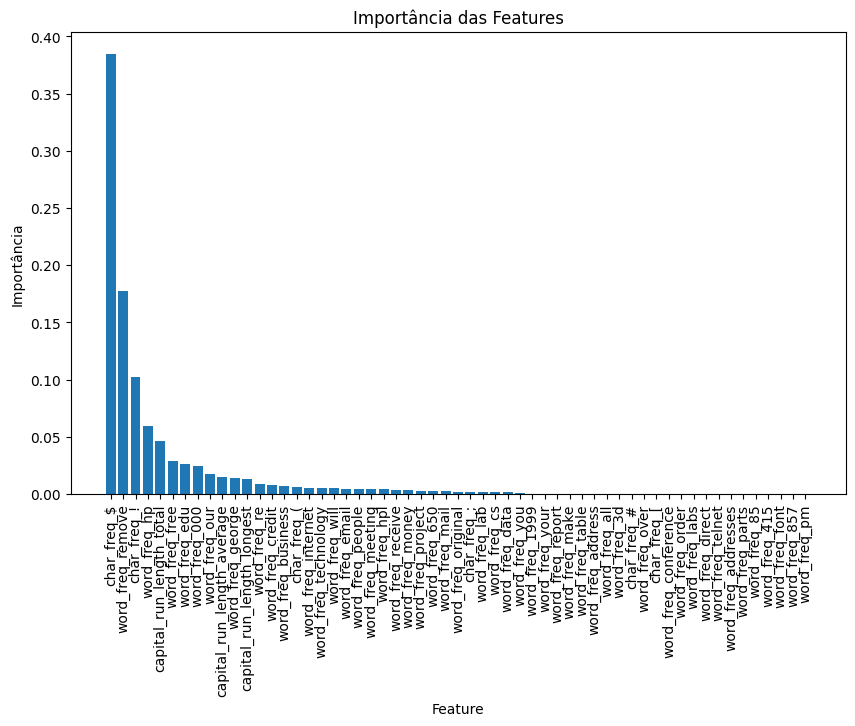

In [ ]:
# 6. Importância das Features -> Para entender quais atributos são mais relevantes.
plt.figure(figsize=(10, 6))
importances = best_dt_classifier.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importância")
plt.title("Importância das Features")
plt.show()


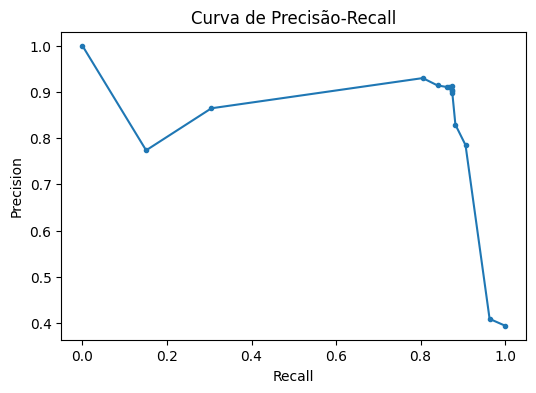

In [ ]:
# 7. Curva de Precisão-Recall -> Para avaliar desempenho além das métricas tradicionais.
precision_vals, recall_vals, _ = precision_recall_curve(y_test, best_dt_classifier.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(recall_vals, precision_vals, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva de Precisão-Recall")
plt.show()

Interpretação da Curva

Se a curva estiver próxima do canto superior direito, significa que o modelo consegue alto recall e alta precisão ao mesmo tempo (ótimo desempenho).

Se a curva for abaixo da linha y = 0.5, significa que o modelo tem desempenho fraco.

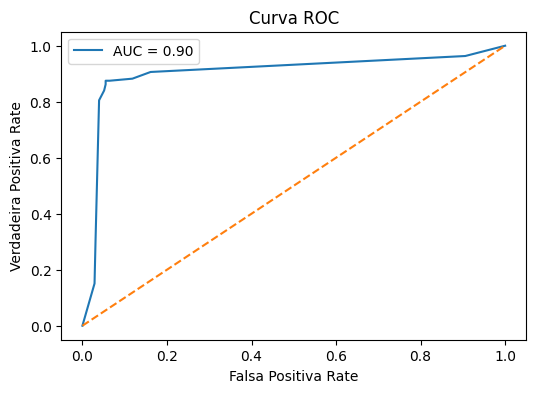

In [ ]:
# 8. Curva ROC -> Para avaliar desempenho além das métricas tradicionais.
y_score = best_dt_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Falsa Positiva Rate")
plt.ylabel("Verdadeira Positiva Rate")
plt.title("Curva ROC")
plt.legend()
plt.show()

Linha tracejada (baseline): Representa um modelo aleatório (AUC = 0.5).

Quanto mais acima essa curva estiver, melhor o desempenho do modelo.

AUC (Área Sob a Curva): Mede o quão bem o modelo separa as classes.
O modelo gerou um AUC = 0.90, o que indica um desempenho muito bom na detecção de spam.

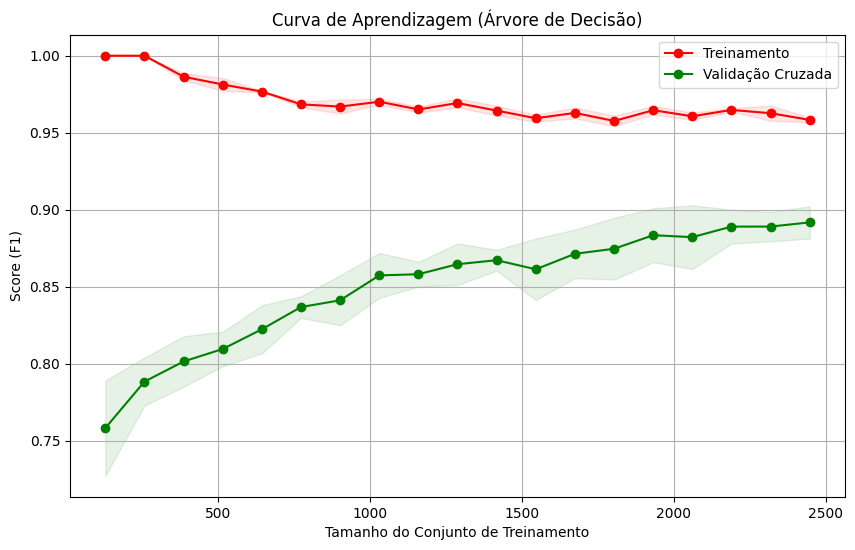

In [ ]:
# 5. Curvas de aprendizagem
def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.05, 0.95, 19)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Tamanho do Conjunto de Treinamento")
    plt.ylabel("Score (F1)")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='f1', train_sizes=train_sizes, n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação Cruzada")

    plt.legend(loc="best")
    plt.show()

# Plotar a curva de aprendizagem
plot_learning_curve(best_dt_classifier, "Curva de Aprendizagem (Árvore de Decisão)", X_train, y_train)

Eixo X : Representa o número de exemplos usados para treinar o modelo.

Eixo Y (Score F1): Mede o desempenho do modelo, combinando precisão e recall.

Curva Vermelha (Treinamento): Indica o desempenho do modelo nos dados de treino.

Curva Verde (Validação Cruzada): Representa o desempenho em dados não vistos (validação cruzada).

Como a curva de treinamento é bem mais alta que a curva de validação, isso indica que o modelo se ajusta muito bem aos dados de treino, mas tem dificuldade de generalizar.
Essa diferença sugere que a árvore de decisão pode estar um pouco complexa demais (com muitos nós e profundidade alta).

# Bayesiano ingenuo

In [ ]:
#BAYES

In [ ]:
# Definição do modelo
gnb = GaussianNB()

# Definição dos hiperparâmetros para ajuste
param_grid = {'var_smoothing': np.logspace(-9, 0, 10)}

In [ ]:
# GridSearchCV para encontrar o melhor hiperparâmetro
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Melhor modelo encontrado
best_gnb = grid_search.best_estimator_
print("Melhor var_smoothing:", grid_search.best_params_['var_smoothing'])

Melhor var_smoothing: 1e-06


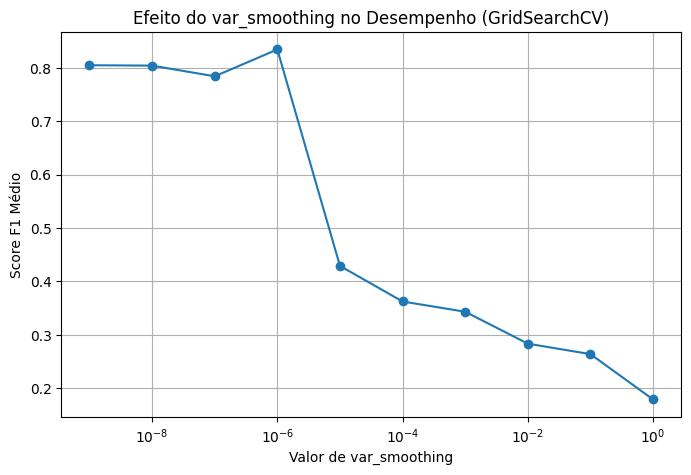

In [ ]:
#VISUALIZANDO O GRIDSEARCH
import seaborn as sns

# Pegando os resultados da busca em grid
results = grid_search.cv_results_
var_smoothing_values = results['param_var_smoothing'].data
mean_test_scores = results['mean_test_score']

# Ordenando para uma melhor visualização
sorted_indices = np.argsort(var_smoothing_values)
var_smoothing_values = np.array(var_smoothing_values)[sorted_indices]
mean_test_scores = np.array(mean_test_scores)[sorted_indices]

# Plotando os resultados
plt.figure(figsize=(8, 5))
plt.plot(var_smoothing_values, mean_test_scores, marker='o', linestyle='-')
plt.xscale('log')  # Escala logarítmica para visualizar melhor os valores
plt.xlabel("Valor de var_smoothing")
plt.ylabel("Score F1 Médio")
plt.title("Efeito do var_smoothing no Desempenho (GridSearchCV)")
plt.grid(True)
plt.show()

In [ ]:
# Fazendo previsões
y_pred = best_gnb.predict(X_test)

# Calculando métricas de avaliação
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Precision: 0.8030
Recall: 0.8989
F1-Score: 0.8482

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       837
           1       0.80      0.90      0.85       544

    accuracy                           0.87      1381
   macro avg       0.87      0.88      0.87      1381
weighted avg       0.88      0.87      0.87      1381



In [ ]:
# Função para plotar curva de aprendizagem
def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.05, 0.95, 19)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Tamanho do Conjunto de Treinamento")
    plt.ylabel("Score (F1)")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring='f1', train_sizes=train_sizes, n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação Cruzada")

    plt.legend(loc="best")
    plt.show()

Curva de aprendizagem Naive-Bayes

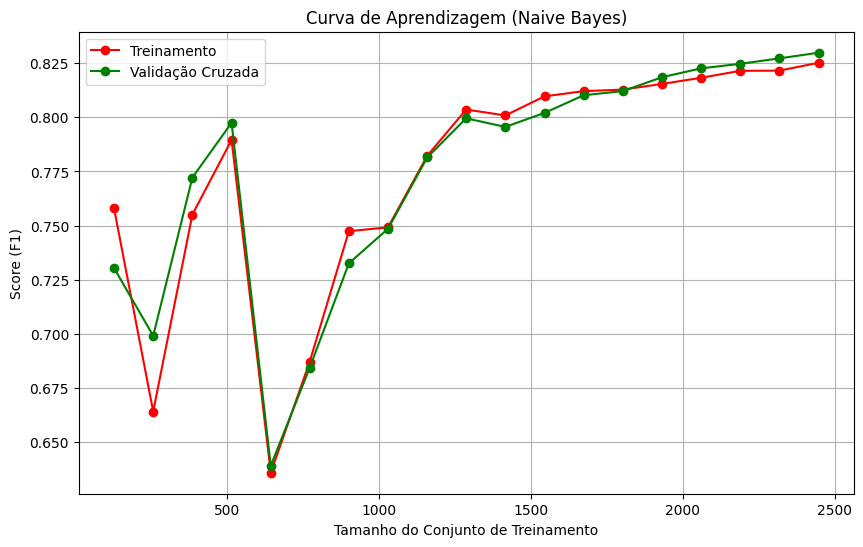

In [ ]:
# Plotar curva de aprendizagem para Naive Bayes
plot_learning_curve(best_gnb, "Curva de Aprendizagem (Naive Bayes)", X_train, y_train)

Matriz de confusão do Naive-Bayes

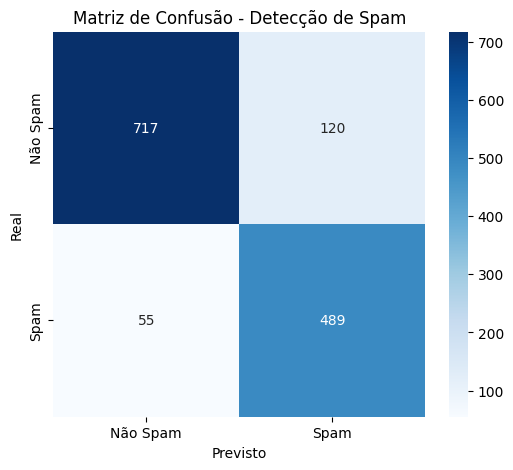

In [ ]:
# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Criando o heatmap da matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Spam", "Spam"], yticklabels=["Não Spam", "Spam"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Detecção de Spam")
plt.show()

# Regressão logistica

In [ ]:
lr = LogisticRegression(max_iter=10000).fit(X_train, y_train)

# Fazer predições no conjunto de teste
y_pred_lr = lr.predict(X_test)

# Calcular as métricas de avaliação
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print("\nResultados no conjunto de teste:")
print("Precision: {:.3f}".format(lr_precision))
print("Recall: {:.3f}".format(lr_recall))
print("F1 Score: {:.3f}".format(lr_f1))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred_lr))


Resultados no conjunto de teste:
Precision: 0.919
Recall: 0.897
F1 Score: 0.908

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.92      0.90      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



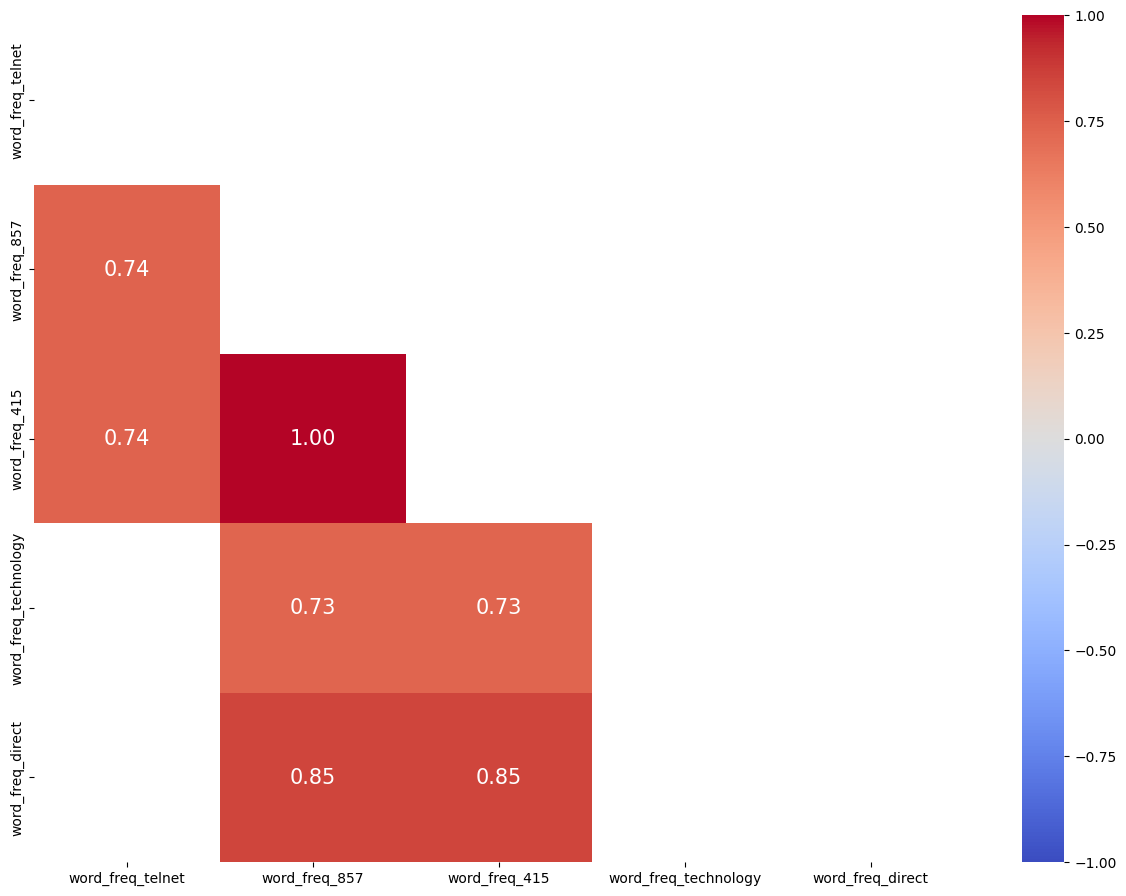

In [ ]:
correlation_matrix = data.corr()

threshold = 0.7
high_corr = correlation_matrix[abs(correlation_matrix) > threshold]
np.fill_diagonal(high_corr.values, np.nan)
mask = np.triu(np.ones_like(high_corr, dtype=bool))
inverse_mask = ~mask

high_corr_masked = high_corr * inverse_mask
high_corr_masked.dropna(how='all', axis=1, inplace=True)
high_corr_masked.dropna(how='all', axis=0, inplace=True)

mask = np.triu(np.ones_like(high_corr_masked, dtype=bool))

plt.rcParams.update({'figure.figsize':(15,11), 'figure.dpi':100})

sns.heatmap(high_corr_masked, mask=mask, annot=True, fmt=".2f", vmin=-1, vmax=1, cbar=True, cmap='coolwarm', annot_kws={'size': 15})
plt.show()

In [ ]:
high_corr_attributes = ['word_freq_telnet', 'word_freq_857', 'word_freq_technology', 'word_freq_direct']

X_train_pop = X_train.drop(columns=high_corr_attributes)
X_test_pop = X_test.drop(columns=high_corr_attributes)

In [ ]:
lr_pop = LogisticRegression(max_iter=10000).fit(X_train_pop, y_train)
y_pred_lr_pop = lr_pop.predict(X_test_pop)
# Calcular as métricas de avaliação
lr_pop_precision = precision_score(y_test, y_pred_lr_pop)
lr_pop_recall = recall_score(y_test, y_pred_lr_pop)
lr_pop_f1 = f1_score(y_test, y_pred_lr_pop)

print("\nResultados no conjunto de teste:")
print("Precision: {:.3f}".format(lr_pop_precision))
print("Recall: {:.3f}".format(lr_pop_recall))
print("F1 Score: {:.3f}".format(lr_pop_f1))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred_lr_pop))


Resultados no conjunto de teste:
Precision: 0.919
Recall: 0.897
F1 Score: 0.908

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.92      0.90      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



In [ ]:
lr_grid = {'penalty': ['l1', 'l2'],
           'solver': ['liblinear']}

lr_grid_classifier = LogisticRegression(max_iter=10000)
lr_gs = GridSearchCV(lr_grid_classifier, lr_grid, cv=10).fit(X_train, y_train)
lr_solver = lr_gs.best_estimator_

# Fazer predições no conjunto de teste
y_pred_lr_solver = lr_solver.predict(X_test)

# Calcular as métricas de avaliação
lr_solver_precision = precision_score(y_test, y_pred_lr_solver)
lr_solver_recall = recall_score(y_test, y_pred_lr_solver)
lr_solver_f1 = f1_score(y_test, y_pred_lr_solver)

print("\nResultados no conjunto de teste:")
print("Precision: {:.3f}".format(lr_solver_precision))
print("Recall: {:.3f}".format(lr_solver_recall))
print("F1 Score: {:.3f}".format(lr_solver_f1))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred_lr_solver))


Resultados no conjunto de teste:
Precision: 0.919
Recall: 0.895
F1 Score: 0.907

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.92      0.90      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



In [ ]:
lr_gs.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
# newton-cg
lr_grid_newtoncg = {'penalty': [None, 'l2'],
                    'solver': ['newton-cg']}

lr_grid_classifier_newtoncg = LogisticRegression(max_iter=10000)
lr_gs_newtoncg = GridSearchCV(lr_grid_classifier_newtoncg, lr_grid_newtoncg, cv=10).fit(X_train, y_train)

# Fazer predições no conjunto de teste
y_pred_lr_ncg = lr.predict(X_test)

# Calcular as métricas de avaliação
lr_ncg_precision = precision_score(y_test, y_pred_lr_ncg)
lr_ncg_recall = recall_score(y_test, y_pred_lr_ncg)
lr_ncg_f1 = f1_score(y_test, y_pred_lr_ncg)

print("\nResultados no conjunto de teste:")
print("Precision: {:.3f}".format(lr_ncg_precision))
print("Recall: {:.3f}".format(lr_ncg_recall))
print("F1 Score: {:.3f}".format(lr_ncg_f1))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred_lr_ncg))


Resultados no conjunto de teste:
Precision: 0.919
Recall: 0.897
F1 Score: 0.908

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.92      0.90      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



In [ ]:
lr_gs_newtoncg.best_params_

{'penalty': None, 'solver': 'newton-cg'}

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LogisticRegression(max_iter=10000).fit(X_train_scaled, y_train)
y_pred_lr_scaled = lr_scaled.predict(X_test_scaled)

# Calcular as métricas de avaliação
lr_scaled_precision = precision_score(y_test, y_pred_lr_scaled)
lr_scaled_recall = recall_score(y_test, y_pred_lr_scaled)
lr_scaled_f1 = f1_score(y_test, y_pred_lr_scaled)

print("Precision: {:.3f}".format(lr_scaled_precision))
print("Recall: {:.3f}".format(lr_scaled_recall))
print("F1 Score: {:.3f}".format(lr_scaled_f1))

print(classification_report(y_test, y_pred_lr_scaled, labels=[0,1]))

Precision: 0.922
Recall: 0.893
F1 Score: 0.908
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.92      0.89      0.91       544

    accuracy                           0.93      1381
   macro avg       0.93      0.92      0.92      1381
weighted avg       0.93      0.93      0.93      1381



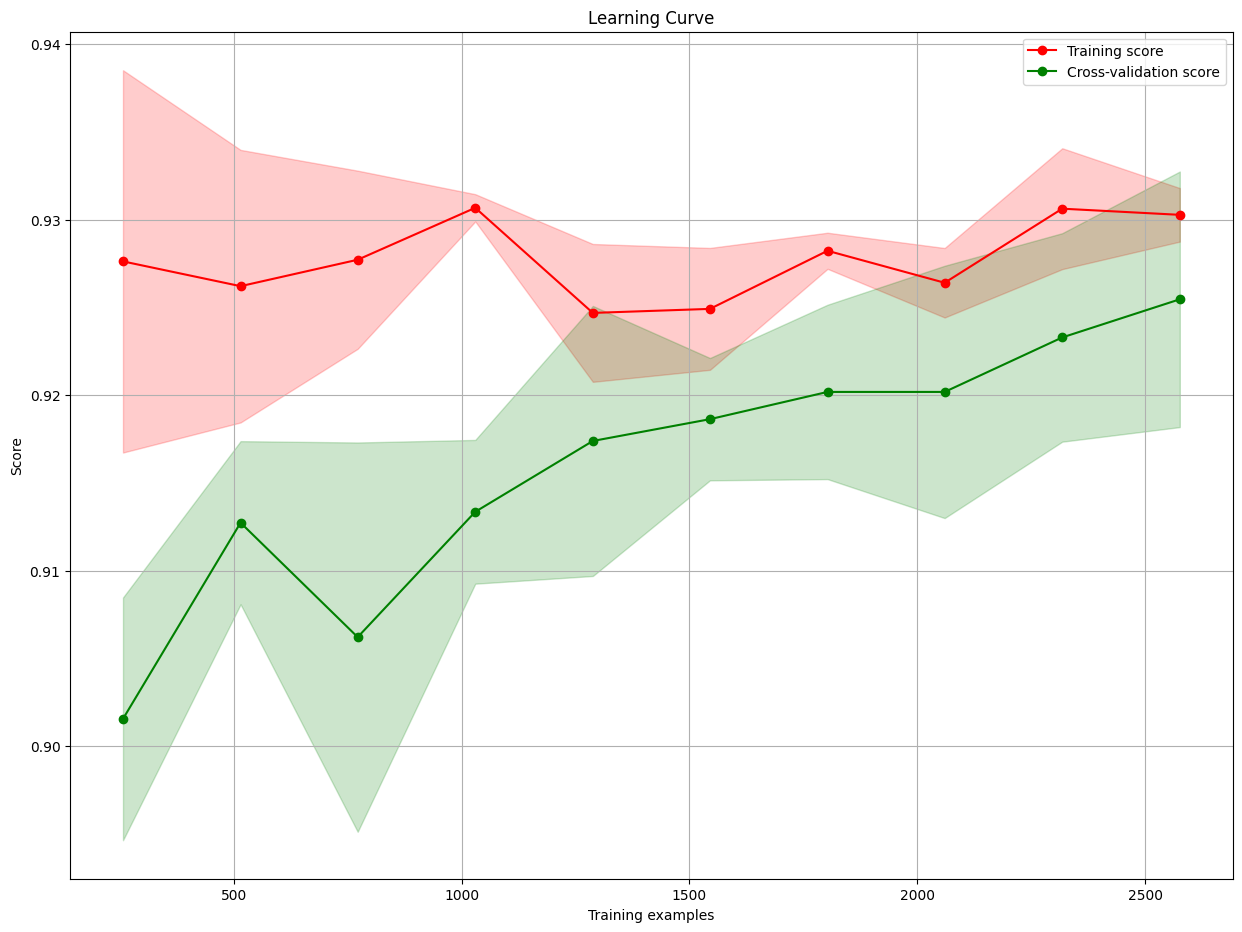

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
cv = 5

train_sizes, train_scores, test_scores = learning_curve(lr, X_train, y_train, train_sizes=train_sizes, cv=cv, scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
        label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
        label="Cross-validation score")

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2, color="g")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

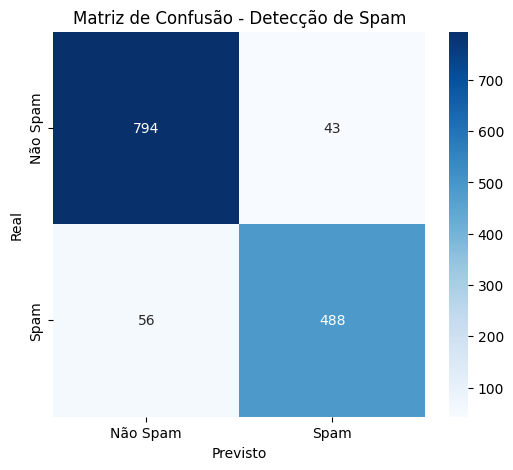

In [ ]:
# Gerando a matriz de confusão
lr_cm = confusion_matrix(y_test, y_pred_lr)

# Criando o heatmap da matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(lr_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Spam", "Spam"], yticklabels=["Não Spam", "Spam"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Detecção de Spam")
plt.show()

# k-vizinhos

In [ ]:
#KNN

In [ ]:
# Importações dos módulos do scikit-learn para KNN
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# Criar um pipeline que inclui a normalização e o classificador KNN com pesos por distância e distância Euclidiana (p=2)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(metric='minkowski', p=2, weights='distance'))
])

# Definir a grade de hiperparâmetros: testar n_neighbors de 1 a 50
param_grid = {'knn__n_neighbors': list(range(1, 51))}

# Utilizar GridSearchCV com validação cruzada de 10 folds e f1-score como métrica
grid_knn = GridSearchCV(pipeline, param_grid, cv=10, scoring='f1', n_jobs=-1)
grid_knn.fit(X_train, y_train)

print("Melhores hiperparâmetros encontrados: ", grid_knn.best_params_)

# Selecionar o melhor classificador
best_knn = grid_knn.best_estimator_

Melhores hiperparâmetros encontrados:  {'knn__n_neighbors': 17}


In [ ]:
# Fazer predições no conjunto de teste
y_pred = best_knn.predict(X_test)

# Calcular as métricas de avaliação
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nResultados no conjunto de teste:")
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("F1 Score: {:.3f}".format(f1))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred))


Resultados no conjunto de teste:
Precision: 0.901
Recall: 0.884
F1 Score: 0.892

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       837
           1       0.90      0.88      0.89       544

    accuracy                           0.92      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.92      0.92      0.92      1381



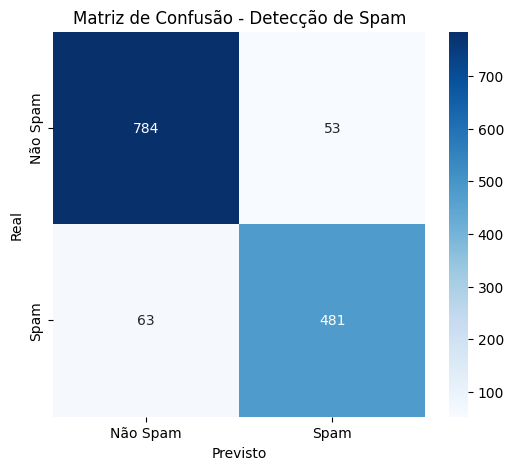

In [ ]:
# Gerando a matriz de confusão
knn_cm = confusion_matrix(y_test, y_pred)

# Criando o heatmap da matriz de confusão
plt.figure(figsize=(6, 5))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Não Spam", "Spam"], yticklabels=["Não Spam", "Spam"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Detecção de Spam")
plt.show()

In [ ]:
# Definir a estratégia de validação cruzada estratificada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Gerar os tamanhos de treino de 5% a 100% do conjunto original de treinamento
train_sizes = np.linspace(0.05, 1.0, 20)

# Definir scorers para as métricas
precision_scorer = make_scorer(precision_score)
recall_scorer    = make_scorer(recall_score)
f1_scorer      = make_scorer(f1_score)

# Curva de aprendizagem para Precision
train_sizes_abs, train_scores_precision, val_scores_precision = learning_curve(
    best_knn, X_train, y_train, train_sizes=train_sizes, cv=cv,
    scoring=precision_scorer, n_jobs=-1
)

# Curva de aprendizagem para Recall
_, train_scores_recall, val_scores_recall = learning_curve(
    best_knn, X_train, y_train, train_sizes=train_sizes, cv=cv,
    scoring=recall_scorer, n_jobs=-1
)

# Curva de aprendizagem para F1 Score
_, train_scores_f1, val_scores_f1 = learning_curve(
    best_knn, X_train, y_train, train_sizes=train_sizes, cv=cv,
    scoring=f1_scorer, n_jobs=-1
)

# Calcular as médias dos scores para cada tamanho de treinamento
precision_train_mean = np.mean(train_scores_precision, axis=1)
precision_val_mean   = np.mean(val_scores_precision, axis=1)

recall_train_mean = np.mean(train_scores_recall, axis=1)
recall_val_mean   = np.mean(val_scores_recall, axis=1)

f1_train_mean = np.mean(train_scores_f1, axis=1)
f1_val_mean   = np.mean(val_scores_f1, axis=1)

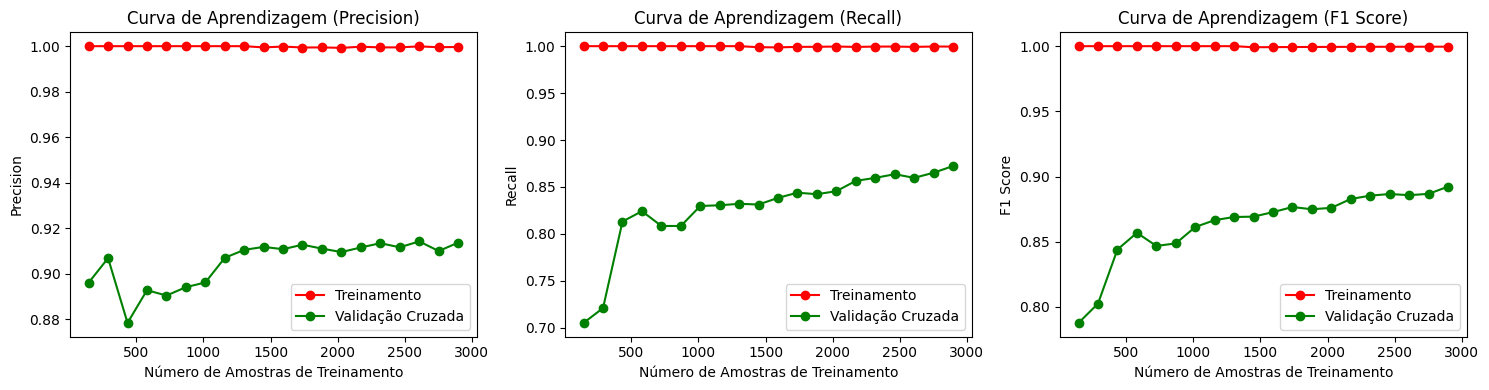

In [ ]:
# Plot das curvas de aprendizagem
plt.figure(figsize=(15, 4))

# Curva de Aprendizagem - Precision
plt.subplot(1, 3, 1)
plt.plot(train_sizes_abs, precision_train_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes_abs, precision_val_mean, 'o-', color="g", label="Validação Cruzada")
plt.title("Curva de Aprendizagem (Precision)")
plt.xlabel("Número de Amostras de Treinamento")
plt.ylabel("Precision")
plt.legend(loc="best")

# Curva de Aprendizagem - Recall
plt.subplot(1, 3, 2)
plt.plot(train_sizes_abs, recall_train_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes_abs, recall_val_mean, 'o-', color="g", label="Validação Cruzada")
plt.title("Curva de Aprendizagem (Recall)")
plt.xlabel("Número de Amostras de Treinamento")
plt.ylabel("Recall")
plt.legend(loc="best")

# Curva de Aprendizagem - F1 Score
plt.subplot(1, 3, 3)
plt.plot(train_sizes_abs, f1_train_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes_abs, f1_val_mean, 'o-', color="g", label="Validação Cruzada")
plt.title("Curva de Aprendizagem (F1 Score)")
plt.xlabel("Número de Amostras de Treinamento")
plt.ylabel("F1 Score")
plt.legend(loc="best")

plt.tight_layout()
plt.show()